<a href="https://colab.research.google.com/github/OrJaku/Machine_Learning/blob/master/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import boston_housing
import numpy as np

(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [0]:
mean = train_data.mean(axis=0) #Mean value of train_data
train_data -= mean
# print("Mean", mean)
std = train_data.std(axis=0) #Standard deviation of train_data
train_data /= std

test_data -= mean
test_data /= std

In [0]:
from keras import models
from keras import layers 

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 80
all_score = []
for i in range(k):
    print("procesing fold #", i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] #Data
    val_target = train_target[i * num_val_samples : (i+1) * num_val_samples] #Target 

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0) #Data
    partial_train_target = np.concatenate([train_target[:i*num_val_samples], train_target[(i+1) * num_val_samples:]], axis=0) #Target 

    model = build_model()
    history = model.fit(train_data, 
              train_target,
              validation_data=(val_data, val_target),
              epochs = num_epochs,
              batch_size=16,
              verbose=0)
    test_mse_score, test_mse_score = model.evaluate(test_data, test_target)

    mea_history = history.history['val_mean_absolute_error']
    all_score.append(mea_history)

In [0]:
print("All Score:", all_score)
print("Mean:", np.mean(all_score))
print("Test value:", test_mse_score)

Test value: 2.660193789239023


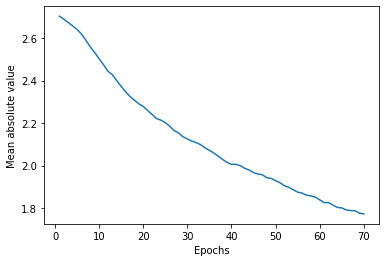

In [23]:
average_mae_history = [np.mean([x[i] for x in all_score]) for i in range(num_epochs)]
import matplotlib.pyplot as plt


def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point  *(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smoothed_mae_history = smooth_curve(average_mae_history[10:])

print("Test value:", test_mse_score)
plt.plot(range(1, len(smoothed_mae_history)+1), smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Mean absolute value')
plt.show()